<a href="https://colab.research.google.com/github/ashitoshm/ML_kaggle_projects/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
df = pd.read_csv('iris.data', names = columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.shape

(150, 5)

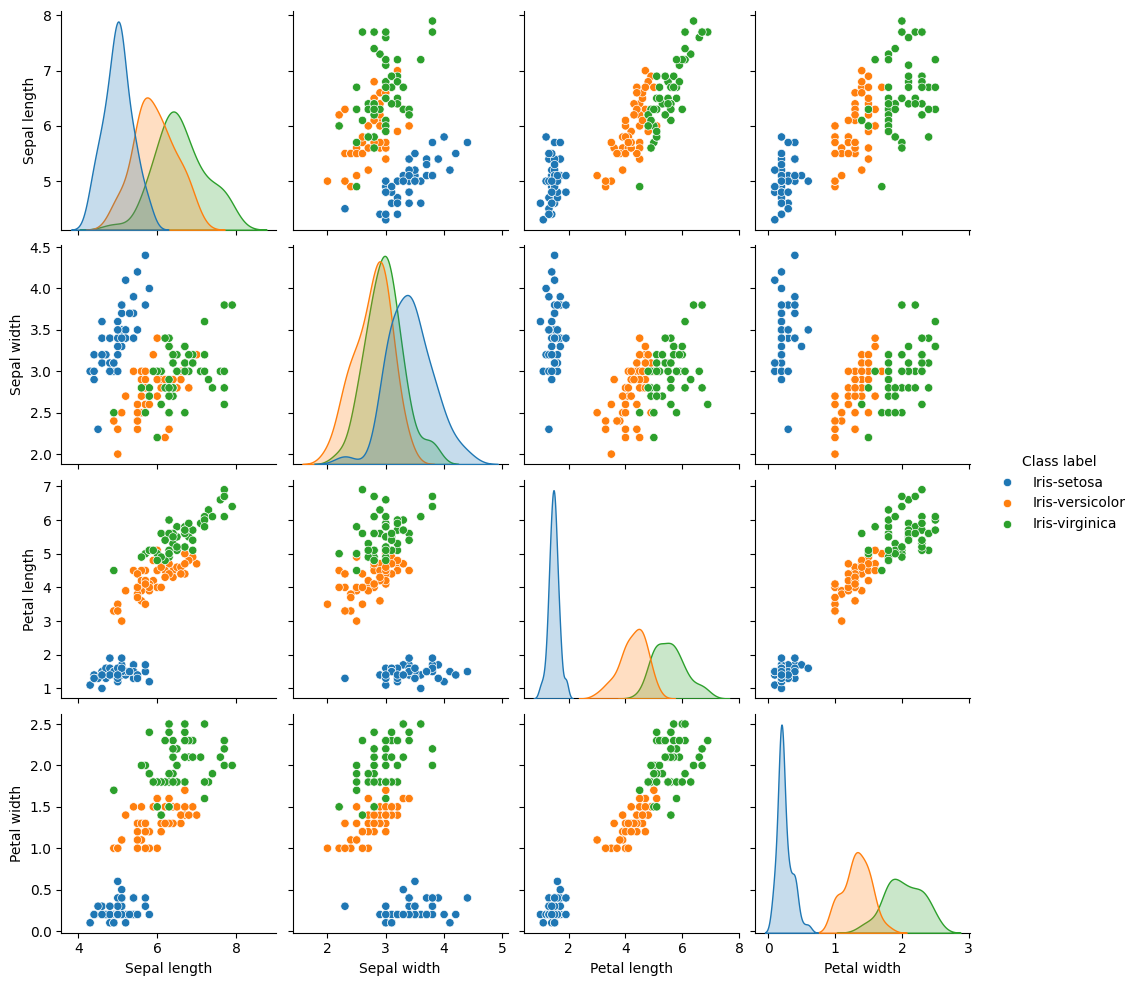

In [13]:
# Lets visualize the dataaaa
sns.pairplot(df, hue='Class label')

In [20]:
#lets seperate features and targets
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [21]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

In [23]:
Y_Data_reshaped

array([[5.006    , 3.418    , 1.4640001, 0.244    ],
       [5.9360003, 2.7700002, 4.26     , 1.3260001],
       [6.5880003, 2.974    , 5.552    , 2.026    ]], dtype=float32)

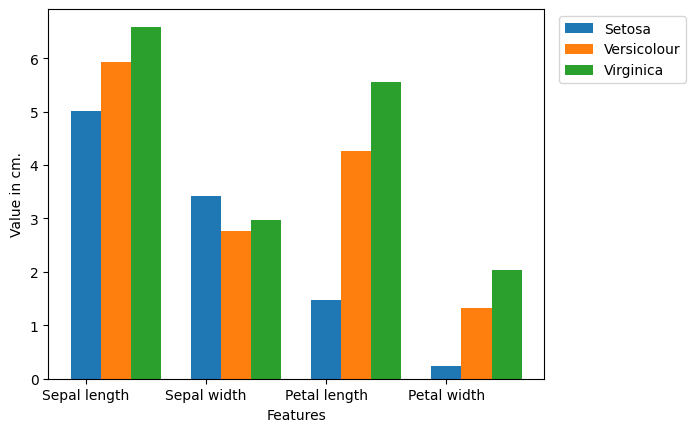

In [25]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [26]:
# Model Training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2)

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [35]:
# Model Evalution
predictions = svc.predict(X_test)

In [36]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

In [37]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [40]:
# Prediction
X_new = np.array([[2, 3, 1, 1.2], [  6.9, 7.2, 5.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = svc.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-virginica' 'Iris-virginica']
